# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:04, 34.5MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile

Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 6590:
Image - Min Value: 13 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 3 Name: cat

Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 8712:
Image - Min Value: 3 Max Value: 246
Image - Shape: (32, 32, 3)
Label - Label Id: 7 Name: horse

Sta

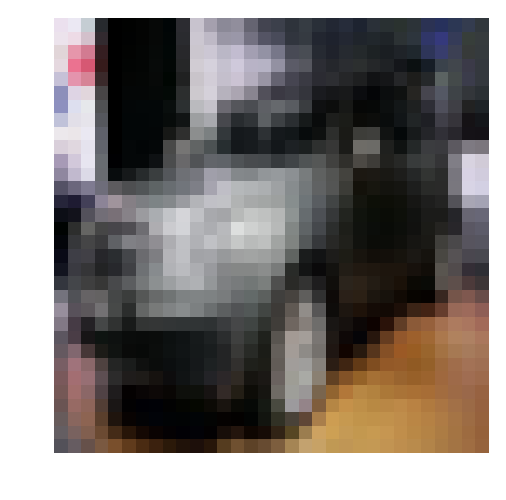

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
import math
from random import random

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Explore the dataset
batch_id = 1
sample_id = 5
total_batches = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

for batch in range(1, total_batches + 1):
    random_sample = math.ceil(random() * 10000)
    helper.display_stats(cifar10_dataset_folder_path, batch, random_sample)
    

#### Observations: ####

I ran above code cell multiple times to get different results, and following are my observations:

1. All batches are of equal size - 10000 samples.
2. There are 10 samples in each batch with almost even distribution.
3. The order of these labels is random, by looking at the first 20 labels in sequence.
4. Each image is of dimension 32x32x3 with min value 0 and max value of 255.

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [67]:
from sklearn import preprocessing

# Define the input dimensions.

ip_w = 32
ip_h = 32
ip_d = 3

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x = np.reshape(x, (-1, (ip_w * ip_h * ip_d)))
    normalized = preprocessing.normalize(x)
    return np.reshape(normalized, (-1, ip_w, ip_h, ip_d))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [68]:
from sklearn.preprocessing import LabelBinarizer

valid_labels = np.array(range(10))
hot_encoder = LabelBinarizer().fit(valid_labels)

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    hot_encoded = hot_encoder.transform(x)
    return hot_encoded


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [69]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    x = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name="x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder(tf.float32, shape=(None, n_classes), name = "y")
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [61]:
import math

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Unpack conv layer parameters.
    batch, ip_w, ip_h, ip_d = x_tensor.shape
    f_w, f_h = conv_ksize
    stride_w, stride_h = conv_strides

    # Create weight dimensions.
    weights_ipd = ip_d.value
    weights_opd = conv_num_outputs

    # Unpack Pool K Size and Pool Stride Size.
    pool_kw, pool_kh = pool_ksize
    pool_stride_w, pool_stride_h = pool_strides 

    # Define weight and bias as tf variables, so they could be learned.
    weight = tf.Variable(tf.truncated_normal([f_w, f_h, weights_ipd, weights_opd], stddev=0.1))
    bias = tf.Variable(tf.zeros(conv_num_outputs))

    # Look at the dimensions of weight.
    print (weight)
    print (bias)
    
    # Conv layer operations.
    conv_layer = tf.nn.conv2d(x_tensor, weight, [1, stride_w, stride_h, 1], "SAME")
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    # Max pooling operation.
    conv_layer = tf.nn.max_pool(conv_layer, [1, pool_kw, pool_kh, 1], [1, pool_stride_w, pool_stride_h, 1], "SAME")

    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

<tf.Variable 'Variable_24:0' shape=(2, 2, 5, 10) dtype=float32_ref>
<tf.Variable 'Variable_25:0' shape=(10,) dtype=float32_ref>
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    batch_size, ip_w, ip_h, ip_d = x_tensor.shape
    return tf.reshape(x_tensor, shape=(-1, ip_w.value * ip_h.value * ip_d.value))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [6]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    features = x_tensor.shape[1].value
    hidden_outputs = num_outputs
    
    # Define the weights and bias for fully connected hidden layer.
    weights_hidden = tf.Variable(tf.truncated_normal([features, hidden_outputs], stddev=0.1))
    bias_hidden = tf.Variable(tf.zeros(hidden_outputs))

    print (weights_hidden)
    print (bias_hidden)
    
    # Hidden layer computation and activation.
    hidden_output = tf.add(tf.matmul(x_tensor, weights_hidden), bias_hidden)
    hidden_output = tf.nn.relu(hidden_output)
    return hidden_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

<tf.Variable 'Variable_4:0' shape=(128, 40) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(40,) dtype=float32_ref>
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    features = x_tensor.shape[1].value

    # Define weights and biases for the output layer.
    weights_output = tf.Variable(tf.truncated_normal([features, num_outputs], stddev=0.1))
    bias_output = tf.Variable(tf.zeros(num_outputs))
    
    print (weights_output)
    print (bias_output)
    
    # Output layer computation.
    output = tf.add(tf.matmul(x_tensor, weights_output), bias_output)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

<tf.Variable 'Variable_6:0' shape=(128, 40) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(40,) dtype=float32_ref>
Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [114]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    x_tensor = x
    
    # Convolution layer 1.
    conv_num_outputs = 64
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Convolution layer 2.
    conv_num_outputs_second = 64
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # Convolution layer 3.
    conv_num_outputs_second = 128
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # Convolution layer 4.
#     conv_num_outputs_second = 512
#     conv_ksize = [5, 5]
#     conv_strides = [2, 2]
#     pool_ksize = [3, 3]
#     pool_strides = [2, 2]
#     conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    tf.nn.dropout(conv_output, keep_prob=keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    flattened = flatten(conv_output)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    
    # Fully connected layer 1.
    fc_hidden_layer_depth = 512
    fully_connected_output = fully_conn(flattened, num_outputs=fc_hidden_layer_depth)
    tf.nn.dropout(fully_connected_output, keep_prob=keep_prob)

    # Fully connected layer 2.
    fc_hidden_layer_depth = 256
    fully_connected_output = fully_conn(fully_connected_output, num_outputs=fc_hidden_layer_depth)
    tf.nn.dropout(fully_connected_output, keep_prob=keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    final_output = output(fully_connected_output, num_outputs=10)
    
    
    # TODO: return output
    return final_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001, epsilon=0.0001).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

<tf.Variable 'Variable:0' shape=(3, 3, 3, 64) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_2:0' shape=(3, 3, 64, 64) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3, 3, 64, 128) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'Variable_6:0' shape=(2048, 512) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'Variable_8:0' shape=(512, 256) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_10:0' shape=(256, 10) dtype=float32_ref>
<tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'Variable_12:0' shape=(3, 3, 3, 64) dtype=float32_ref>
<tf.Variable 'Variable_13:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_14:0' shape=(3, 3, 64, 64) dtype=float32_ref>
<tf.Variable 'Variable_15:0' shape=(64,) dtype=flo

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [115]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [116]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    cost_result = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    
    print("Loss: {}, Validation Accuracy: {}".format(cost_result, validation_accuracy))
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [120]:
# TODO: Tune Parameters
epochs = 1000
batch_size = 512
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [112]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
save_model_path = './image_classification'

print('Training...')
print ('Epochs: {}'.format(epochs))

config = tf.ConfigProto(log_device_placement=True)

with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    print("Training the model with bath size: {}, epochs: {}, keep probability: {}".format(batch_size, epochs, keep_probability))
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        if epoch % 100 == 0:
            print ("Saving the trained model.")
            saver = tf.train.Saver()
            save_path = saver.save(sess, save_model_path)

Checking the Training on a Single Batch...
Training...
Epochs: 100
Training the model with bath size: 256, epochs: 100, keep probability: 0.5
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.0523781776428223, Validation Accuracy: 0.2961999773979187
Saving the trained model.
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.7155215740203857, Validation Accuracy: 0.38339996337890625
Epoch  3, CIFAR-10 Batch 1:  Loss: 1.5732582807540894, Validation Accuracy: 0.41359996795654297
Epoch  4, CIFAR-10 Batch 1:  Loss: 1.4034559726715088, Validation Accuracy: 0.4285999834537506
Epoch  5, CIFAR-10 Batch 1:  Loss: 1.2250471115112305, Validation Accuracy: 0.4577999711036682
Epoch  6, CIFAR-10 Batch 1:  Loss: 1.1721957921981812, Validation Accuracy: 0.4408000111579895
Epoch  7, CIFAR-10 Batch 1:  Loss: 1.0285711288452148, Validation Accuracy: 0.4551999866962433
Epoch  8, CIFAR-10 Batch 1:  Loss: 0.8165987730026245, Validation Accuracy: 0.5017999410629272
Epoch  9, CIFAR-10 Batch 1:  Loss: 0.7394711971282959, Validation Accu

Epoch 84, CIFAR-10 Batch 1:  Loss: 2.3156155748438323e-06, Validation Accuracy: 0.6297998428344727
Epoch 85, CIFAR-10 Batch 1:  Loss: 2.2351509869622532e-06, Validation Accuracy: 0.6291998624801636
Epoch 86, CIFAR-10 Batch 1:  Loss: 2.1636269593727775e-06, Validation Accuracy: 0.6287999153137207
Epoch 87, CIFAR-10 Batch 1:  Loss: 2.086142558255233e-06, Validation Accuracy: 0.6287999153137207
Epoch 88, CIFAR-10 Batch 1:  Loss: 2.023558863584185e-06, Validation Accuracy: 0.6287999153137207
Epoch 89, CIFAR-10 Batch 1:  Loss: 1.9520348359947093e-06, Validation Accuracy: 0.6289999485015869
Epoch 90, CIFAR-10 Batch 1:  Loss: 1.8954115148517303e-06, Validation Accuracy: 0.6287999153137207
Epoch 91, CIFAR-10 Batch 1:  Loss: 1.8268669919052627e-06, Validation Accuracy: 0.6289999485015869
Epoch 92, CIFAR-10 Batch 1:  Loss: 1.7702436707622837e-06, Validation Accuracy: 0.6289998292922974
Epoch 93, CIFAR-10 Batch 1:  Loss: 1.7195804957736982e-06, Validation Accuracy: 0.6291998624801636
Epoch 94, CI

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [121]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
print ('Epochs: {}'.format(epochs))

config = tf.ConfigProto(log_device_placement=True)

with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
        # Save at every 10th epoch.
        if epoch % 100 == 0:
            print ("Saving the trained model.")
            saver = tf.train.Saver()
            save_path = saver.save(sess, save_model_path)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epochs: 1000
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.2403295040130615, Validation Accuracy: 0.2361999899148941
Epoch  1, CIFAR-10 Batch 2:  Loss: 2.028923511505127, Validation Accuracy: 0.20899999141693115
Epoch  1, CIFAR-10 Batch 3:  Loss: 1.9003708362579346, Validation Accuracy: 0.3046000003814697
Epoch  1, CIFAR-10 Batch 4:  Loss: 1.7794957160949707, Validation Accuracy: 0.3240000009536743
Epoch  1, CIFAR-10 Batch 5:  Loss: 1.7510604858398438, Validation Accuracy: 0.392799973487854
Saving the trained model.
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.6864887475967407, Validation Accuracy: 0.4034000039100647
Epoch  2, CIFAR-10 Batch 2:  Loss: 1.5768285989761353, Validation Accuracy: 0.44419997930526733
Epoch  2, CIFAR-10 Batch 3:  Loss: 1.4844791889190674, Validation Accuracy: 0.3943999707698822
Epoch  2, CIFAR-10 Batch 4:  Loss: 1.3905614614486694, Validation Accuracy: 0.4713999927043915
Epoch  2, CIFAR-10 Batch 5:  Loss: 1.4669978618621826, Validation Accuracy: 0.4785999655723572

Epoch 18, CIFAR-10 Batch 2:  Loss: 0.48455262184143066, Validation Accuracy: 0.6711999177932739
Epoch 18, CIFAR-10 Batch 3:  Loss: 0.3959377706050873, Validation Accuracy: 0.6979998350143433
Epoch 18, CIFAR-10 Batch 4:  Loss: 0.3828921616077423, Validation Accuracy: 0.6923998594284058
Epoch 18, CIFAR-10 Batch 5:  Loss: 0.37241241335868835, Validation Accuracy: 0.6953997611999512
Epoch 19, CIFAR-10 Batch 1:  Loss: 0.4290819764137268, Validation Accuracy: 0.7015998959541321
Epoch 19, CIFAR-10 Batch 2:  Loss: 0.5364843010902405, Validation Accuracy: 0.6333999037742615
Epoch 19, CIFAR-10 Batch 3:  Loss: 0.41198837757110596, Validation Accuracy: 0.6889998912811279
Epoch 19, CIFAR-10 Batch 4:  Loss: 0.3623494505882263, Validation Accuracy: 0.6907998323440552
Epoch 19, CIFAR-10 Batch 5:  Loss: 0.32795432209968567, Validation Accuracy: 0.7001997828483582
Epoch 20, CIFAR-10 Batch 1:  Loss: 0.4175117611885071, Validation Accuracy: 0.6927998661994934
Epoch 20, CIFAR-10 Batch 2:  Loss: 0.489983677

Epoch 35, CIFAR-10 Batch 3:  Loss: 0.0900002121925354, Validation Accuracy: 0.7035998702049255
Epoch 35, CIFAR-10 Batch 4:  Loss: 0.1269819289445877, Validation Accuracy: 0.6867998242378235
Epoch 35, CIFAR-10 Batch 5:  Loss: 0.09535787999629974, Validation Accuracy: 0.703799843788147
Epoch 36, CIFAR-10 Batch 1:  Loss: 0.11027129739522934, Validation Accuracy: 0.6979998350143433
Epoch 36, CIFAR-10 Batch 2:  Loss: 0.10603918135166168, Validation Accuracy: 0.7045997977256775
Epoch 36, CIFAR-10 Batch 3:  Loss: 0.09240212291479111, Validation Accuracy: 0.6997998952865601
Epoch 36, CIFAR-10 Batch 4:  Loss: 0.0903712809085846, Validation Accuracy: 0.6941998600959778
Epoch 36, CIFAR-10 Batch 5:  Loss: 0.09688682854175568, Validation Accuracy: 0.6949998736381531
Epoch 37, CIFAR-10 Batch 1:  Loss: 0.11596819758415222, Validation Accuracy: 0.6807999014854431
Epoch 37, CIFAR-10 Batch 2:  Loss: 0.10265789926052094, Validation Accuracy: 0.69899982213974
Epoch 37, CIFAR-10 Batch 3:  Loss: 0.067991383

Epoch 52, CIFAR-10 Batch 4:  Loss: 0.033380135893821716, Validation Accuracy: 0.6743998527526855
Epoch 52, CIFAR-10 Batch 5:  Loss: 0.017638983204960823, Validation Accuracy: 0.7175998687744141
Epoch 53, CIFAR-10 Batch 1:  Loss: 0.030637195333838463, Validation Accuracy: 0.6859999299049377
Epoch 53, CIFAR-10 Batch 2:  Loss: 0.028281383216381073, Validation Accuracy: 0.7005999088287354
Epoch 53, CIFAR-10 Batch 3:  Loss: 0.01981518231332302, Validation Accuracy: 0.6965998411178589
Epoch 53, CIFAR-10 Batch 4:  Loss: 0.033241156488657, Validation Accuracy: 0.6867998838424683
Epoch 53, CIFAR-10 Batch 5:  Loss: 0.02353321760892868, Validation Accuracy: 0.7173998355865479
Epoch 54, CIFAR-10 Batch 1:  Loss: 0.026110054925084114, Validation Accuracy: 0.6891998648643494
Epoch 54, CIFAR-10 Batch 2:  Loss: 0.020589007064700127, Validation Accuracy: 0.7059998512268066
Epoch 54, CIFAR-10 Batch 3:  Loss: 0.03252498805522919, Validation Accuracy: 0.6767998933792114
Epoch 54, CIFAR-10 Batch 4:  Loss: 0

Epoch 69, CIFAR-10 Batch 4:  Loss: 0.012312469072639942, Validation Accuracy: 0.6905999779701233
Epoch 69, CIFAR-10 Batch 5:  Loss: 0.006956456694751978, Validation Accuracy: 0.7103999257087708
Epoch 70, CIFAR-10 Batch 1:  Loss: 0.009490106254816055, Validation Accuracy: 0.7159999012947083
Epoch 70, CIFAR-10 Batch 2:  Loss: 0.005608128383755684, Validation Accuracy: 0.7165998220443726
Epoch 70, CIFAR-10 Batch 3:  Loss: 0.011482486501336098, Validation Accuracy: 0.6817998886108398
Epoch 70, CIFAR-10 Batch 4:  Loss: 0.007610800676047802, Validation Accuracy: 0.6951999068260193
Epoch 70, CIFAR-10 Batch 5:  Loss: 0.004172839689999819, Validation Accuracy: 0.7107998132705688
Epoch 71, CIFAR-10 Batch 1:  Loss: 0.003604424651712179, Validation Accuracy: 0.7211998701095581
Epoch 71, CIFAR-10 Batch 2:  Loss: 0.003498458070680499, Validation Accuracy: 0.7145999073982239
Epoch 71, CIFAR-10 Batch 3:  Loss: 0.006108131259679794, Validation Accuracy: 0.6963998079299927
Epoch 71, CIFAR-10 Batch 4:  L

Epoch 86, CIFAR-10 Batch 3:  Loss: 0.008324707858264446, Validation Accuracy: 0.6927999258041382
Epoch 86, CIFAR-10 Batch 4:  Loss: 0.000872203556355089, Validation Accuracy: 0.7129998207092285
Epoch 86, CIFAR-10 Batch 5:  Loss: 0.0029799784533679485, Validation Accuracy: 0.7065998911857605
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.002921736566349864, Validation Accuracy: 0.7001998424530029
Epoch 87, CIFAR-10 Batch 2:  Loss: 0.00379483075812459, Validation Accuracy: 0.7127999067306519
Epoch 87, CIFAR-10 Batch 3:  Loss: 0.002313333097845316, Validation Accuracy: 0.7061998844146729
Epoch 87, CIFAR-10 Batch 4:  Loss: 0.0015715283807367086, Validation Accuracy: 0.7123998999595642
Epoch 87, CIFAR-10 Batch 5:  Loss: 0.0025098146870732307, Validation Accuracy: 0.7187998294830322
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0012293827021494508, Validation Accuracy: 0.7119998931884766
Epoch 88, CIFAR-10 Batch 2:  Loss: 0.004600847139954567, Validation Accuracy: 0.7019999027252197
Epoch 88, CIFAR-10 Batch 3:

Epoch 103, CIFAR-10 Batch 2:  Loss: 0.0013655312359333038, Validation Accuracy: 0.7079998254776001
Epoch 103, CIFAR-10 Batch 3:  Loss: 0.006633419543504715, Validation Accuracy: 0.68479984998703
Epoch 103, CIFAR-10 Batch 4:  Loss: 0.002704646671190858, Validation Accuracy: 0.7083998322486877
Epoch 103, CIFAR-10 Batch 5:  Loss: 0.0014837993076071143, Validation Accuracy: 0.7079998254776001
Epoch 104, CIFAR-10 Batch 1:  Loss: 0.0019093286246061325, Validation Accuracy: 0.7105998992919922
Epoch 104, CIFAR-10 Batch 2:  Loss: 0.002081231214106083, Validation Accuracy: 0.709199845790863
Epoch 104, CIFAR-10 Batch 3:  Loss: 0.0017308907117694616, Validation Accuracy: 0.703799843788147
Epoch 104, CIFAR-10 Batch 4:  Loss: 0.005782079417258501, Validation Accuracy: 0.6923998594284058
Epoch 104, CIFAR-10 Batch 5:  Loss: 0.004055023193359375, Validation Accuracy: 0.7083998322486877
Epoch 105, CIFAR-10 Batch 1:  Loss: 0.0034853836987167597, Validation Accuracy: 0.7021998167037964
Epoch 105, CIFAR-10

Epoch 119, CIFAR-10 Batch 5:  Loss: 0.003732782555744052, Validation Accuracy: 0.6977999210357666
Epoch 120, CIFAR-10 Batch 1:  Loss: 0.0073426030576229095, Validation Accuracy: 0.7039998769760132
Epoch 120, CIFAR-10 Batch 2:  Loss: 0.002541767666116357, Validation Accuracy: 0.7115998268127441
Epoch 120, CIFAR-10 Batch 3:  Loss: 0.0013442300260066986, Validation Accuracy: 0.7107998728752136
Epoch 120, CIFAR-10 Batch 4:  Loss: 0.0017140083946287632, Validation Accuracy: 0.7117998600006104
Epoch 120, CIFAR-10 Batch 5:  Loss: 0.0006927463691681623, Validation Accuracy: 0.7137998342514038
Epoch 121, CIFAR-10 Batch 1:  Loss: 0.004368582274764776, Validation Accuracy: 0.7057998776435852
Epoch 121, CIFAR-10 Batch 2:  Loss: 0.0018301766831427813, Validation Accuracy: 0.7163998484611511
Epoch 121, CIFAR-10 Batch 3:  Loss: 0.002556984080001712, Validation Accuracy: 0.7105998396873474
Epoch 121, CIFAR-10 Batch 4:  Loss: 0.001285033649764955, Validation Accuracy: 0.7149998545646667
Epoch 121, CIFA

Epoch 136, CIFAR-10 Batch 3:  Loss: 0.0009902665624395013, Validation Accuracy: 0.7193998694419861
Epoch 136, CIFAR-10 Batch 4:  Loss: 0.0014915274223312736, Validation Accuracy: 0.7053998112678528
Epoch 136, CIFAR-10 Batch 5:  Loss: 0.0011776259634643793, Validation Accuracy: 0.7129998803138733
Epoch 137, CIFAR-10 Batch 1:  Loss: 0.0014849725412204862, Validation Accuracy: 0.7107999324798584
Epoch 137, CIFAR-10 Batch 2:  Loss: 0.0009441719157621264, Validation Accuracy: 0.709199845790863
Epoch 137, CIFAR-10 Batch 3:  Loss: 0.001957844477146864, Validation Accuracy: 0.7095998525619507
Epoch 137, CIFAR-10 Batch 4:  Loss: 0.0012415359960868955, Validation Accuracy: 0.7015998363494873
Epoch 137, CIFAR-10 Batch 5:  Loss: 0.0015247415285557508, Validation Accuracy: 0.7105998992919922
Epoch 138, CIFAR-10 Batch 1:  Loss: 0.0012964487541466951, Validation Accuracy: 0.7003998756408691
Epoch 138, CIFAR-10 Batch 2:  Loss: 0.000698799267411232, Validation Accuracy: 0.7167998552322388
Epoch 138, CI

Epoch 153, CIFAR-10 Batch 1:  Loss: 0.00041951530147343874, Validation Accuracy: 0.7155998945236206
Epoch 153, CIFAR-10 Batch 2:  Loss: 0.000400058226659894, Validation Accuracy: 0.7197998762130737
Epoch 153, CIFAR-10 Batch 3:  Loss: 0.0006417403346858919, Validation Accuracy: 0.7235998511314392
Epoch 153, CIFAR-10 Batch 4:  Loss: 0.0013442100025713444, Validation Accuracy: 0.7071998715400696
Epoch 153, CIFAR-10 Batch 5:  Loss: 0.0012869329657405615, Validation Accuracy: 0.7177999019622803
Epoch 154, CIFAR-10 Batch 1:  Loss: 0.0007039137417450547, Validation Accuracy: 0.7229998707771301
Epoch 154, CIFAR-10 Batch 2:  Loss: 0.0007271507638506591, Validation Accuracy: 0.7247998118400574
Epoch 154, CIFAR-10 Batch 3:  Loss: 0.0007338722352869809, Validation Accuracy: 0.7197998762130737
Epoch 154, CIFAR-10 Batch 4:  Loss: 0.00018733915931079537, Validation Accuracy: 0.7171998620033264
Epoch 154, CIFAR-10 Batch 5:  Loss: 0.002109270077198744, Validation Accuracy: 0.7089999318122864
Epoch 155,

Epoch 169, CIFAR-10 Batch 4:  Loss: 0.0008138315752148628, Validation Accuracy: 0.7177998423576355
Epoch 169, CIFAR-10 Batch 5:  Loss: 0.0006927362410351634, Validation Accuracy: 0.7159998416900635
Epoch 170, CIFAR-10 Batch 1:  Loss: 0.001410421566106379, Validation Accuracy: 0.7177999019622803
Epoch 170, CIFAR-10 Batch 2:  Loss: 0.0006142578204162419, Validation Accuracy: 0.7229998707771301
Epoch 170, CIFAR-10 Batch 3:  Loss: 0.0022854721173644066, Validation Accuracy: 0.7013998627662659
Epoch 170, CIFAR-10 Batch 4:  Loss: 0.0008346650865860283, Validation Accuracy: 0.7015998363494873
Epoch 170, CIFAR-10 Batch 5:  Loss: 0.0012721569510176778, Validation Accuracy: 0.710399866104126
Epoch 171, CIFAR-10 Batch 1:  Loss: 0.00659911660477519, Validation Accuracy: 0.7035998702049255
Epoch 171, CIFAR-10 Batch 2:  Loss: 0.0007510962896049023, Validation Accuracy: 0.7095998525619507
Epoch 171, CIFAR-10 Batch 3:  Loss: 0.0005684469942934811, Validation Accuracy: 0.7197998762130737
Epoch 171, CIF

Epoch 186, CIFAR-10 Batch 2:  Loss: 0.0006362005369737744, Validation Accuracy: 0.7229998111724854
Epoch 186, CIFAR-10 Batch 3:  Loss: 0.00032284381450153887, Validation Accuracy: 0.7155998945236206
Epoch 186, CIFAR-10 Batch 4:  Loss: 0.0010747964261099696, Validation Accuracy: 0.7201998829841614
Epoch 186, CIFAR-10 Batch 5:  Loss: 0.0006699715740978718, Validation Accuracy: 0.7163998484611511
Epoch 187, CIFAR-10 Batch 1:  Loss: 0.00026258156867697835, Validation Accuracy: 0.7289997935295105
Epoch 187, CIFAR-10 Batch 2:  Loss: 0.00014775805175304413, Validation Accuracy: 0.7253998517990112
Epoch 187, CIFAR-10 Batch 3:  Loss: 0.000297125312499702, Validation Accuracy: 0.7283998727798462
Epoch 187, CIFAR-10 Batch 4:  Loss: 0.0010336556006222963, Validation Accuracy: 0.7247998714447021
Epoch 187, CIFAR-10 Batch 5:  Loss: 0.0014974543591961265, Validation Accuracy: 0.7145997881889343
Epoch 188, CIFAR-10 Batch 1:  Loss: 0.0004721875593531877, Validation Accuracy: 0.7183998823165894
Epoch 18

Epoch 202, CIFAR-10 Batch 5:  Loss: 0.0008732231799513102, Validation Accuracy: 0.7213998436927795
Epoch 203, CIFAR-10 Batch 1:  Loss: 0.0007591753965243697, Validation Accuracy: 0.7241998910903931
Epoch 203, CIFAR-10 Batch 2:  Loss: 0.0004551622550934553, Validation Accuracy: 0.7169998288154602
Epoch 203, CIFAR-10 Batch 3:  Loss: 0.00027103396132588387, Validation Accuracy: 0.7279998660087585
Epoch 203, CIFAR-10 Batch 4:  Loss: 0.0004535036568995565, Validation Accuracy: 0.7221997976303101
Epoch 203, CIFAR-10 Batch 5:  Loss: 0.00032768642995506525, Validation Accuracy: 0.7197998762130737
Epoch 204, CIFAR-10 Batch 1:  Loss: 0.00027522240998223424, Validation Accuracy: 0.7219998240470886
Epoch 204, CIFAR-10 Batch 2:  Loss: 0.0009466000483371317, Validation Accuracy: 0.7151997685432434
Epoch 204, CIFAR-10 Batch 3:  Loss: 0.0010451580164954066, Validation Accuracy: 0.7237998843193054
Epoch 204, CIFAR-10 Batch 4:  Loss: 0.0010888974647969007, Validation Accuracy: 0.719799816608429
Epoch 20

Epoch 219, CIFAR-10 Batch 3:  Loss: 0.003963009919971228, Validation Accuracy: 0.7155998945236206
Epoch 219, CIFAR-10 Batch 4:  Loss: 0.0007332958048209548, Validation Accuracy: 0.7119998931884766
Epoch 219, CIFAR-10 Batch 5:  Loss: 0.000836145190987736, Validation Accuracy: 0.7163999080657959
Epoch 220, CIFAR-10 Batch 1:  Loss: 0.0008916078368201852, Validation Accuracy: 0.7151998281478882
Epoch 220, CIFAR-10 Batch 2:  Loss: 0.0005933096399530768, Validation Accuracy: 0.722399890422821
Epoch 220, CIFAR-10 Batch 3:  Loss: 0.00015610370610374957, Validation Accuracy: 0.7185998558998108
Epoch 220, CIFAR-10 Batch 4:  Loss: 0.004217992536723614, Validation Accuracy: 0.708599865436554
Epoch 220, CIFAR-10 Batch 5:  Loss: 0.000557988416403532, Validation Accuracy: 0.7147998213768005
Epoch 221, CIFAR-10 Batch 1:  Loss: 0.0003939390298910439, Validation Accuracy: 0.7161998748779297
Epoch 221, CIFAR-10 Batch 2:  Loss: 0.0005749184638261795, Validation Accuracy: 0.7247998714447021
Epoch 221, CIFA

Epoch 236, CIFAR-10 Batch 1:  Loss: 0.000715853413566947, Validation Accuracy: 0.7199998497962952
Epoch 236, CIFAR-10 Batch 2:  Loss: 0.0003022139426320791, Validation Accuracy: 0.7249999046325684
Epoch 236, CIFAR-10 Batch 3:  Loss: 0.0002626991190481931, Validation Accuracy: 0.7153998017311096
Epoch 236, CIFAR-10 Batch 4:  Loss: 2.5843364710453898e-05, Validation Accuracy: 0.7115998864173889
Epoch 236, CIFAR-10 Batch 5:  Loss: 0.0007178247906267643, Validation Accuracy: 0.7213998436927795
Epoch 237, CIFAR-10 Batch 1:  Loss: 0.0004959580255672336, Validation Accuracy: 0.7163998484611511
Epoch 237, CIFAR-10 Batch 2:  Loss: 0.00033460944541729987, Validation Accuracy: 0.716999888420105
Epoch 237, CIFAR-10 Batch 3:  Loss: 0.0004461785720195621, Validation Accuracy: 0.7143998742103577
Epoch 237, CIFAR-10 Batch 4:  Loss: 9.37644945224747e-05, Validation Accuracy: 0.7265998721122742
Epoch 237, CIFAR-10 Batch 5:  Loss: 4.7870733396848664e-05, Validation Accuracy: 0.726399838924408
Epoch 238, 

Epoch 252, CIFAR-10 Batch 4:  Loss: 0.00014182030281517655, Validation Accuracy: 0.7145998477935791
Epoch 252, CIFAR-10 Batch 5:  Loss: 0.0008166037150658667, Validation Accuracy: 0.7097998261451721
Epoch 253, CIFAR-10 Batch 1:  Loss: 0.0007891731220297515, Validation Accuracy: 0.7057998776435852
Epoch 253, CIFAR-10 Batch 2:  Loss: 0.0018405761802569032, Validation Accuracy: 0.7145997881889343
Epoch 253, CIFAR-10 Batch 3:  Loss: 0.00016762525774538517, Validation Accuracy: 0.7233998775482178
Epoch 253, CIFAR-10 Batch 4:  Loss: 0.00016295253590214998, Validation Accuracy: 0.7177999019622803
Epoch 253, CIFAR-10 Batch 5:  Loss: 3.875316906487569e-05, Validation Accuracy: 0.7201998829841614
Epoch 254, CIFAR-10 Batch 1:  Loss: 9.344873251393437e-05, Validation Accuracy: 0.7181998491287231
Epoch 254, CIFAR-10 Batch 2:  Loss: 0.0005974219529889524, Validation Accuracy: 0.7137998342514038
Epoch 254, CIFAR-10 Batch 3:  Loss: 0.0002582129673101008, Validation Accuracy: 0.7307998538017273
Epoch 2

Epoch 269, CIFAR-10 Batch 2:  Loss: 5.476337537402287e-05, Validation Accuracy: 0.7215998768806458
Epoch 269, CIFAR-10 Batch 3:  Loss: 0.0001108937431126833, Validation Accuracy: 0.7189998030662537
Epoch 269, CIFAR-10 Batch 4:  Loss: 9.28629597183317e-05, Validation Accuracy: 0.7249998450279236
Epoch 269, CIFAR-10 Batch 5:  Loss: 0.0005209748051129282, Validation Accuracy: 0.7289998531341553
Epoch 270, CIFAR-10 Batch 1:  Loss: 0.00029929314041510224, Validation Accuracy: 0.7223998308181763
Epoch 270, CIFAR-10 Batch 2:  Loss: 6.772780761821195e-05, Validation Accuracy: 0.7309998273849487
Epoch 270, CIFAR-10 Batch 3:  Loss: 0.00018552030087448657, Validation Accuracy: 0.7177997827529907
Epoch 270, CIFAR-10 Batch 4:  Loss: 0.0013005095534026623, Validation Accuracy: 0.7015998959541321
Epoch 270, CIFAR-10 Batch 5:  Loss: 0.0007994936313480139, Validation Accuracy: 0.7125998735427856
Epoch 271, CIFAR-10 Batch 1:  Loss: 0.0010397090809419751, Validation Accuracy: 0.7129998207092285
Epoch 271

Epoch 285, CIFAR-10 Batch 5:  Loss: 8.696050826983992e-06, Validation Accuracy: 0.7429999113082886
Epoch 286, CIFAR-10 Batch 1:  Loss: 2.843286495135544e-07, Validation Accuracy: 0.7421998977661133
Epoch 286, CIFAR-10 Batch 2:  Loss: 4.2031147131638136e-06, Validation Accuracy: 0.7427998781204224
Epoch 286, CIFAR-10 Batch 3:  Loss: 5.435396815300919e-06, Validation Accuracy: 0.7423998713493347
Epoch 286, CIFAR-10 Batch 4:  Loss: 1.2500299817475025e-06, Validation Accuracy: 0.7425998449325562
Epoch 286, CIFAR-10 Batch 5:  Loss: 7.84981602919288e-06, Validation Accuracy: 0.7423998117446899
Epoch 287, CIFAR-10 Batch 1:  Loss: 2.7305225103191333e-07, Validation Accuracy: 0.7423998713493347
Epoch 287, CIFAR-10 Batch 2:  Loss: 3.912831743946299e-06, Validation Accuracy: 0.7423998713493347
Epoch 287, CIFAR-10 Batch 3:  Loss: 4.9867276175064035e-06, Validation Accuracy: 0.7423998713493347
Epoch 287, CIFAR-10 Batch 4:  Loss: 1.212177267007064e-06, Validation Accuracy: 0.7423998713493347
Epoch 2

Epoch 302, CIFAR-10 Batch 3:  Loss: 2.110951754730195e-06, Validation Accuracy: 0.7423999309539795
Epoch 302, CIFAR-10 Batch 4:  Loss: 8.126935426844284e-07, Validation Accuracy: 0.7423998713493347
Epoch 302, CIFAR-10 Batch 5:  Loss: 2.8366639526211657e-06, Validation Accuracy: 0.7423998713493347
Epoch 303, CIFAR-10 Batch 1:  Loss: 1.824379012305144e-07, Validation Accuracy: 0.74319988489151
Epoch 303, CIFAR-10 Batch 2:  Loss: 1.6692492863512598e-06, Validation Accuracy: 0.7427998781204224
Epoch 303, CIFAR-10 Batch 3:  Loss: 2.0243810467945877e-06, Validation Accuracy: 0.7425999045372009
Epoch 303, CIFAR-10 Batch 4:  Loss: 7.889335620347993e-07, Validation Accuracy: 0.7427998781204224
Epoch 303, CIFAR-10 Batch 5:  Loss: 2.707848125282908e-06, Validation Accuracy: 0.7427999377250671
Epoch 304, CIFAR-10 Batch 1:  Loss: 1.7881333747027384e-07, Validation Accuracy: 0.7429998517036438
Epoch 304, CIFAR-10 Batch 2:  Loss: 1.6024025626393268e-06, Validation Accuracy: 0.7425999045372009
Epoch 3

Epoch 319, CIFAR-10 Batch 1:  Loss: 1.3692923062080808e-07, Validation Accuracy: 0.742999792098999
Epoch 319, CIFAR-10 Batch 2:  Loss: 9.302920602749509e-07, Validation Accuracy: 0.7429999113082886
Epoch 319, CIFAR-10 Batch 3:  Loss: 1.1368767900421517e-06, Validation Accuracy: 0.742999792098999
Epoch 319, CIFAR-10 Batch 4:  Loss: 5.062281047685246e-07, Validation Accuracy: 0.7429999113082886
Epoch 319, CIFAR-10 Batch 5:  Loss: 1.4650106550107012e-06, Validation Accuracy: 0.742999792098999
Epoch 320, CIFAR-10 Batch 1:  Loss: 1.3451283109588985e-07, Validation Accuracy: 0.742999792098999
Epoch 320, CIFAR-10 Batch 2:  Loss: 9.004913295029837e-07, Validation Accuracy: 0.742999792098999
Epoch 320, CIFAR-10 Batch 3:  Loss: 1.0994258445862215e-06, Validation Accuracy: 0.742999792098999
Epoch 320, CIFAR-10 Batch 4:  Loss: 4.925356051899143e-07, Validation Accuracy: 0.742999792098999
Epoch 320, CIFAR-10 Batch 5:  Loss: 1.417497969669057e-06, Validation Accuracy: 0.7429999113082886
Epoch 321, C

Epoch 335, CIFAR-10 Batch 4:  Loss: 3.44736804436252e-07, Validation Accuracy: 0.7437998056411743
Epoch 335, CIFAR-10 Batch 5:  Loss: 9.044940156854864e-07, Validation Accuracy: 0.7439998388290405
Epoch 336, CIFAR-10 Batch 1:  Loss: 1.0551611495657198e-07, Validation Accuracy: 0.7439998388290405
Epoch 336, CIFAR-10 Batch 2:  Loss: 5.601950761047192e-07, Validation Accuracy: 0.7441998720169067
Epoch 336, CIFAR-10 Batch 3:  Loss: 7.116177584975958e-07, Validation Accuracy: 0.7441998720169067
Epoch 336, CIFAR-10 Batch 4:  Loss: 3.3708505497997976e-07, Validation Accuracy: 0.7437998056411743
Epoch 336, CIFAR-10 Batch 5:  Loss: 8.827487931739597e-07, Validation Accuracy: 0.7439998388290405
Epoch 337, CIFAR-10 Batch 1:  Loss: 1.0471065081674169e-07, Validation Accuracy: 0.7439998388290405
Epoch 337, CIFAR-10 Batch 2:  Loss: 5.452943696582224e-07, Validation Accuracy: 0.7443998456001282
Epoch 337, CIFAR-10 Batch 3:  Loss: 6.955091294003068e-07, Validation Accuracy: 0.7441998720169067
Epoch 33

Epoch 352, CIFAR-10 Batch 2:  Loss: 3.8017742554075085e-07, Validation Accuracy: 0.7441998720169067
Epoch 352, CIFAR-10 Batch 3:  Loss: 5.146880539541598e-07, Validation Accuracy: 0.7439998388290405
Epoch 352, CIFAR-10 Batch 4:  Loss: 2.432498149573803e-07, Validation Accuracy: 0.744399905204773
Epoch 352, CIFAR-10 Batch 5:  Loss: 6.161630494716519e-07, Validation Accuracy: 0.7441998720169067
Epoch 353, CIFAR-10 Batch 1:  Loss: 8.215762647978408e-08, Validation Accuracy: 0.7439998388290405
Epoch 353, CIFAR-10 Batch 2:  Loss: 3.7212288361843093e-07, Validation Accuracy: 0.7441998720169067
Epoch 353, CIFAR-10 Batch 3:  Loss: 5.050226832281624e-07, Validation Accuracy: 0.7439998388290405
Epoch 353, CIFAR-10 Batch 4:  Loss: 2.4002798681976856e-07, Validation Accuracy: 0.7445998191833496
Epoch 353, CIFAR-10 Batch 5:  Loss: 6.032764758856501e-07, Validation Accuracy: 0.7441998720169067
Epoch 354, CIFAR-10 Batch 1:  Loss: 8.135215523452644e-08, Validation Accuracy: 0.7439998984336853
Epoch 35

Epoch 368, CIFAR-10 Batch 5:  Loss: 4.56287210681694e-07, Validation Accuracy: 0.7445998191833496
Epoch 369, CIFAR-10 Batch 1:  Loss: 6.604830815604146e-08, Validation Accuracy: 0.7437998056411743
Epoch 369, CIFAR-10 Batch 2:  Loss: 2.73454645594029e-07, Validation Accuracy: 0.7435998320579529
Epoch 369, CIFAR-10 Batch 3:  Loss: 3.850106793379382e-07, Validation Accuracy: 0.7439998388290405
Epoch 369, CIFAR-10 Batch 4:  Loss: 1.812295806757902e-07, Validation Accuracy: 0.7439998388290405
Epoch 369, CIFAR-10 Batch 5:  Loss: 4.4944107457922655e-07, Validation Accuracy: 0.7445998191833496
Epoch 370, CIFAR-10 Batch 1:  Loss: 6.484010839358234e-08, Validation Accuracy: 0.7439997792243958
Epoch 370, CIFAR-10 Batch 2:  Loss: 2.6983011025549786e-07, Validation Accuracy: 0.7435998320579529
Epoch 370, CIFAR-10 Batch 3:  Loss: 3.777615802391665e-07, Validation Accuracy: 0.7445997595787048
Epoch 370, CIFAR-10 Batch 4:  Loss: 1.7841045973909786e-07, Validation Accuracy: 0.7441997528076172
Epoch 370

Epoch 385, CIFAR-10 Batch 3:  Loss: 3.0245149673646665e-07, Validation Accuracy: 0.7441998720169067
Epoch 385, CIFAR-10 Batch 4:  Loss: 1.4095648737111333e-07, Validation Accuracy: 0.7439998388290405
Epoch 385, CIFAR-10 Batch 5:  Loss: 3.503727441511728e-07, Validation Accuracy: 0.7447998523712158
Epoch 386, CIFAR-10 Batch 1:  Loss: 5.436903904865176e-08, Validation Accuracy: 0.7437998652458191
Epoch 386, CIFAR-10 Batch 2:  Loss: 2.0821256896397244e-07, Validation Accuracy: 0.7435998916625977
Epoch 386, CIFAR-10 Batch 3:  Loss: 2.996323473780649e-07, Validation Accuracy: 0.7441998720169067
Epoch 386, CIFAR-10 Batch 4:  Loss: 1.3773463081179216e-07, Validation Accuracy: 0.7439998388290405
Epoch 386, CIFAR-10 Batch 5:  Loss: 3.4634555845514114e-07, Validation Accuracy: 0.7447998523712158
Epoch 387, CIFAR-10 Batch 1:  Loss: 5.356356780339411e-08, Validation Accuracy: 0.7439998388290405
Epoch 387, CIFAR-10 Batch 2:  Loss: 2.0579622628247307e-07, Validation Accuracy: 0.7439998388290405
Epoc

Epoch 402, CIFAR-10 Batch 1:  Loss: 4.873076164813028e-08, Validation Accuracy: 0.7445998787879944
Epoch 402, CIFAR-10 Batch 2:  Loss: 1.651204257768768e-07, Validation Accuracy: 0.7439997792243958
Epoch 402, CIFAR-10 Batch 3:  Loss: 2.4768027628851996e-07, Validation Accuracy: 0.7443998456001282
Epoch 402, CIFAR-10 Batch 4:  Loss: 1.095433930231593e-07, Validation Accuracy: 0.7447998523712158
Epoch 402, CIFAR-10 Batch 5:  Loss: 2.956025468847656e-07, Validation Accuracy: 0.7451998591423035
Epoch 403, CIFAR-10 Batch 1:  Loss: 4.873076164813028e-08, Validation Accuracy: 0.7445998787879944
Epoch 403, CIFAR-10 Batch 2:  Loss: 1.631067618745874e-07, Validation Accuracy: 0.7439997792243958
Epoch 403, CIFAR-10 Batch 3:  Loss: 2.436529769056506e-07, Validation Accuracy: 0.7443998456001282
Epoch 403, CIFAR-10 Batch 4:  Loss: 1.0752972912086989e-07, Validation Accuracy: 0.744799792766571
Epoch 403, CIFAR-10 Batch 5:  Loss: 2.9278351121320156e-07, Validation Accuracy: 0.7455998659133911
Epoch 40

Epoch 418, CIFAR-10 Batch 4:  Loss: 9.021225366723229e-08, Validation Accuracy: 0.7443998456001282
Epoch 418, CIFAR-10 Batch 5:  Loss: 2.525111710838246e-07, Validation Accuracy: 0.7459998726844788
Epoch 419, CIFAR-10 Batch 1:  Loss: 4.3092494905749845e-08, Validation Accuracy: 0.7437998056411743
Epoch 419, CIFAR-10 Batch 2:  Loss: 1.3290191702708398e-07, Validation Accuracy: 0.7433998584747314
Epoch 419, CIFAR-10 Batch 3:  Loss: 2.053935475032631e-07, Validation Accuracy: 0.7451998591423035
Epoch 419, CIFAR-10 Batch 4:  Loss: 8.980952515003082e-08, Validation Accuracy: 0.7443998456001282
Epoch 419, CIFAR-10 Batch 5:  Loss: 2.5009484261317994e-07, Validation Accuracy: 0.7457998394966125
Epoch 420, CIFAR-10 Batch 1:  Loss: 4.268975928312102e-08, Validation Accuracy: 0.7439998388290405
Epoch 420, CIFAR-10 Batch 2:  Loss: 1.3088825312479457e-07, Validation Accuracy: 0.7439998388290405
Epoch 420, CIFAR-10 Batch 3:  Loss: 2.0499081188063428e-07, Validation Accuracy: 0.7451999187469482
Epoch

Epoch 435, CIFAR-10 Batch 2:  Loss: 1.1397352039921316e-07, Validation Accuracy: 0.7437999248504639
Epoch 435, CIFAR-10 Batch 3:  Loss: 1.796187234504032e-07, Validation Accuracy: 0.7441998720169067
Epoch 435, CIFAR-10 Batch 4:  Loss: 7.85329987706973e-08, Validation Accuracy: 0.7445998191833496
Epoch 435, CIFAR-10 Batch 5:  Loss: 2.126414244685293e-07, Validation Accuracy: 0.7453998923301697
Epoch 436, CIFAR-10 Batch 1:  Loss: 4.027335265277543e-08, Validation Accuracy: 0.7439998388290405
Epoch 436, CIFAR-10 Batch 2:  Loss: 1.1195984939149639e-07, Validation Accuracy: 0.7437999248504639
Epoch 436, CIFAR-10 Batch 3:  Loss: 1.7881328062685498e-07, Validation Accuracy: 0.7441998720169067
Epoch 436, CIFAR-10 Batch 4:  Loss: 7.772753463086701e-08, Validation Accuracy: 0.7445998191833496
Epoch 436, CIFAR-10 Batch 5:  Loss: 2.1103052461057814e-07, Validation Accuracy: 0.7451999187469482
Epoch 437, CIFAR-10 Batch 1:  Loss: 3.9870620582860283e-08, Validation Accuracy: 0.7439998388290405
Epoch 

Epoch 451, CIFAR-10 Batch 5:  Loss: 1.8042334204437793e-07, Validation Accuracy: 0.7453998327255249
Epoch 452, CIFAR-10 Batch 1:  Loss: 3.825968519777234e-08, Validation Accuracy: 0.7425998449325562
Epoch 452, CIFAR-10 Batch 2:  Loss: 9.746145934741435e-08, Validation Accuracy: 0.7441998720169067
Epoch 452, CIFAR-10 Batch 3:  Loss: 1.6431492610990972e-07, Validation Accuracy: 0.744199812412262
Epoch 452, CIFAR-10 Batch 4:  Loss: 7.088107167874114e-08, Validation Accuracy: 0.7451997995376587
Epoch 452, CIFAR-10 Batch 5:  Loss: 1.8002062063260382e-07, Validation Accuracy: 0.744999885559082
Epoch 453, CIFAR-10 Batch 1:  Loss: 3.785694957514352e-08, Validation Accuracy: 0.7425998449325562
Epoch 453, CIFAR-10 Batch 2:  Loss: 9.786420207547053e-08, Validation Accuracy: 0.7441998720169067
Epoch 453, CIFAR-10 Batch 3:  Loss: 1.6471766173253855e-07, Validation Accuracy: 0.7437998056411743
Epoch 453, CIFAR-10 Batch 4:  Loss: 7.047833605611231e-08, Validation Accuracy: 0.744999885559082
Epoch 453

Epoch 468, CIFAR-10 Batch 3:  Loss: 1.542466350201721e-07, Validation Accuracy: 0.7437998652458191
Epoch 468, CIFAR-10 Batch 4:  Loss: 6.443734434924409e-08, Validation Accuracy: 0.7443998456001282
Epoch 468, CIFAR-10 Batch 5:  Loss: 1.510242668700812e-07, Validation Accuracy: 0.7449998259544373
Epoch 469, CIFAR-10 Batch 1:  Loss: 3.423235028776617e-08, Validation Accuracy: 0.7431998252868652
Epoch 469, CIFAR-10 Batch 2:  Loss: 8.779588256402349e-08, Validation Accuracy: 0.7435998320579529
Epoch 469, CIFAR-10 Batch 3:  Loss: 1.5263572095136624e-07, Validation Accuracy: 0.7437998056411743
Epoch 469, CIFAR-10 Batch 4:  Loss: 6.403461583204262e-08, Validation Accuracy: 0.7445998191833496
Epoch 469, CIFAR-10 Batch 5:  Loss: 1.486079099777271e-07, Validation Accuracy: 0.7447998523712158
Epoch 470, CIFAR-10 Batch 1:  Loss: 3.382961821785102e-08, Validation Accuracy: 0.7433998584747314
Epoch 470, CIFAR-10 Batch 2:  Loss: 8.537948303910525e-08, Validation Accuracy: 0.7435998916625977
Epoch 470

Epoch 485, CIFAR-10 Batch 1:  Loss: 2.8996822720728233e-08, Validation Accuracy: 0.7431998252868652
Epoch 485, CIFAR-10 Batch 2:  Loss: 7.651936329011733e-08, Validation Accuracy: 0.7439998984336853
Epoch 485, CIFAR-10 Batch 3:  Loss: 1.4216468002814509e-07, Validation Accuracy: 0.7435998916625977
Epoch 485, CIFAR-10 Batch 4:  Loss: 6.081275216729409e-08, Validation Accuracy: 0.7445998191833496
Epoch 485, CIFAR-10 Batch 5:  Loss: 1.276660128723961e-07, Validation Accuracy: 0.7447998523712158
Epoch 486, CIFAR-10 Batch 1:  Loss: 2.8996822720728233e-08, Validation Accuracy: 0.7431998252868652
Epoch 486, CIFAR-10 Batch 2:  Loss: 7.732483453537498e-08, Validation Accuracy: 0.744199812412262
Epoch 486, CIFAR-10 Batch 3:  Loss: 1.4095650158196804e-07, Validation Accuracy: 0.7435998320579529
Epoch 486, CIFAR-10 Batch 4:  Loss: 6.081275216729409e-08, Validation Accuracy: 0.7447998523712158
Epoch 486, CIFAR-10 Batch 5:  Loss: 1.2605509880359023e-07, Validation Accuracy: 0.7447998523712158
Epoch 

Epoch 501, CIFAR-10 Batch 4:  Loss: 5.396628921516822e-08, Validation Accuracy: 0.7443997859954834
Epoch 501, CIFAR-10 Batch 5:  Loss: 1.131677649368612e-07, Validation Accuracy: 0.7447998523712158
Saving the trained model.
Epoch 502, CIFAR-10 Batch 1:  Loss: 2.7788624734625955e-08, Validation Accuracy: 0.7433997988700867
Epoch 502, CIFAR-10 Batch 2:  Loss: 7.007564306604763e-08, Validation Accuracy: 0.7443998456001282
Epoch 502, CIFAR-10 Batch 3:  Loss: 1.3088822470308514e-07, Validation Accuracy: 0.7441998720169067
Epoch 502, CIFAR-10 Batch 4:  Loss: 5.396628921516822e-08, Validation Accuracy: 0.744799792766571
Epoch 502, CIFAR-10 Batch 5:  Loss: 1.1276502931423238e-07, Validation Accuracy: 0.7447998523712158
Epoch 503, CIFAR-10 Batch 1:  Loss: 2.7788624734625955e-08, Validation Accuracy: 0.7433998584747314
Epoch 503, CIFAR-10 Batch 2:  Loss: 6.886743619816116e-08, Validation Accuracy: 0.7445998787879944
Epoch 503, CIFAR-10 Batch 3:  Loss: 1.2968001783519867e-07, Validation Accuracy:

Epoch 518, CIFAR-10 Batch 1:  Loss: 2.6983157042081984e-08, Validation Accuracy: 0.7437998056411743
Epoch 518, CIFAR-10 Batch 2:  Loss: 6.524284401621117e-08, Validation Accuracy: 0.7443998456001282
Epoch 518, CIFAR-10 Batch 3:  Loss: 1.1840351987757458e-07, Validation Accuracy: 0.7439998388290405
Epoch 518, CIFAR-10 Batch 4:  Loss: 5.0341700585931903e-08, Validation Accuracy: 0.7451998591423035
Epoch 518, CIFAR-10 Batch 5:  Loss: 1.0672406602907358e-07, Validation Accuracy: 0.7447998523712158
Epoch 519, CIFAR-10 Batch 1:  Loss: 2.738588911199713e-08, Validation Accuracy: 0.7437998652458191
Epoch 519, CIFAR-10 Batch 2:  Loss: 6.564557963883999e-08, Validation Accuracy: 0.7447998523712158
Epoch 519, CIFAR-10 Batch 3:  Loss: 1.1800078425494576e-07, Validation Accuracy: 0.744199812412262
Epoch 519, CIFAR-10 Batch 4:  Loss: 5.0341700585931903e-08, Validation Accuracy: 0.7449998259544373
Epoch 519, CIFAR-10 Batch 5:  Loss: 1.0632133040644476e-07, Validation Accuracy: 0.7445999383926392
Epoc

Epoch 534, CIFAR-10 Batch 4:  Loss: 4.510616946618029e-08, Validation Accuracy: 0.7449997663497925
Epoch 534, CIFAR-10 Batch 5:  Loss: 1.0148855267289036e-07, Validation Accuracy: 0.744199812412262
Epoch 535, CIFAR-10 Batch 1:  Loss: 2.6177685796824335e-08, Validation Accuracy: 0.7439998388290405
Epoch 535, CIFAR-10 Batch 2:  Loss: 6.081278058900352e-08, Validation Accuracy: 0.7449998259544373
Epoch 535, CIFAR-10 Batch 3:  Loss: 1.0752975043715196e-07, Validation Accuracy: 0.7445998787879944
Epoch 535, CIFAR-10 Batch 4:  Loss: 4.3897969703721174e-08, Validation Accuracy: 0.7449998259544373
Epoch 535, CIFAR-10 Batch 5:  Loss: 1.0148855267289036e-07, Validation Accuracy: 0.7441998720169067
Epoch 536, CIFAR-10 Batch 1:  Loss: 2.577495372690919e-08, Validation Accuracy: 0.7439998388290405
Epoch 536, CIFAR-10 Batch 2:  Loss: 6.121551621163235e-08, Validation Accuracy: 0.7447998523712158
Epoch 536, CIFAR-10 Batch 3:  Loss: 1.0672428629732167e-07, Validation Accuracy: 0.7445998787879944
Epoch

Epoch 551, CIFAR-10 Batch 2:  Loss: 5.678544923171103e-08, Validation Accuracy: 0.7447998523712158
Epoch 551, CIFAR-10 Batch 3:  Loss: 9.826690217096257e-08, Validation Accuracy: 0.744199812412262
Epoch 551, CIFAR-10 Batch 4:  Loss: 4.107884166160147e-08, Validation Accuracy: 0.7449997663497925
Epoch 551, CIFAR-10 Batch 5:  Loss: 9.585033211578775e-08, Validation Accuracy: 0.7441998720169067
Epoch 552, CIFAR-10 Batch 1:  Loss: 2.577495372690919e-08, Validation Accuracy: 0.7435998916625977
Epoch 552, CIFAR-10 Batch 2:  Loss: 5.63827136090822e-08, Validation Accuracy: 0.7447998523712158
Epoch 552, CIFAR-10 Batch 3:  Loss: 9.705870240850345e-08, Validation Accuracy: 0.744199812412262
Epoch 552, CIFAR-10 Batch 4:  Loss: 4.067610248625897e-08, Validation Accuracy: 0.7453998327255249
Epoch 552, CIFAR-10 Batch 5:  Loss: 9.585032501036039e-08, Validation Accuracy: 0.7435998320579529
Epoch 553, CIFAR-10 Batch 1:  Loss: 2.6177687573181174e-08, Validation Accuracy: 0.7433997988700867
Epoch 553, C

Epoch 567, CIFAR-10 Batch 5:  Loss: 9.222575414469247e-08, Validation Accuracy: 0.7433998584747314
Epoch 568, CIFAR-10 Batch 1:  Loss: 2.4969486034365218e-08, Validation Accuracy: 0.7437998652458191
Epoch 568, CIFAR-10 Batch 2:  Loss: 5.275811787441853e-08, Validation Accuracy: 0.7445998787879944
Epoch 568, CIFAR-10 Batch 3:  Loss: 9.061498928986111e-08, Validation Accuracy: 0.744199812412262
Epoch 568, CIFAR-10 Batch 4:  Loss: 3.7454238821510444e-08, Validation Accuracy: 0.7451997995376587
Epoch 568, CIFAR-10 Batch 5:  Loss: 9.222574703926512e-08, Validation Accuracy: 0.7433998584747314
Epoch 569, CIFAR-10 Batch 1:  Loss: 2.4969487810722057e-08, Validation Accuracy: 0.7435998320579529
Epoch 569, CIFAR-10 Batch 2:  Loss: 5.2355382251789706e-08, Validation Accuracy: 0.7445998191833496
Epoch 569, CIFAR-10 Batch 3:  Loss: 9.021225366723229e-08, Validation Accuracy: 0.7439998388290405
Epoch 569, CIFAR-10 Batch 4:  Loss: 3.7454238821510444e-08, Validation Accuracy: 0.7451997995376587
Epoch 

Epoch 584, CIFAR-10 Batch 3:  Loss: 8.537946882825054e-08, Validation Accuracy: 0.7443998456001282
Epoch 584, CIFAR-10 Batch 4:  Loss: 3.4635107226677064e-08, Validation Accuracy: 0.7449998259544373
Epoch 584, CIFAR-10 Batch 5:  Loss: 8.77957120337669e-08, Validation Accuracy: 0.7435998916625977
Epoch 585, CIFAR-10 Batch 1:  Loss: 2.4566753964450072e-08, Validation Accuracy: 0.7437998056411743
Epoch 585, CIFAR-10 Batch 2:  Loss: 4.832804734178353e-08, Validation Accuracy: 0.7445998191833496
Epoch 585, CIFAR-10 Batch 3:  Loss: 8.497673320562171e-08, Validation Accuracy: 0.7443998456001282
Epoch 585, CIFAR-10 Batch 4:  Loss: 3.423237160404824e-08, Validation Accuracy: 0.744999885559082
Epoch 585, CIFAR-10 Batch 5:  Loss: 8.77957120337669e-08, Validation Accuracy: 0.7437998056411743
Epoch 586, CIFAR-10 Batch 1:  Loss: 2.4566753964450072e-08, Validation Accuracy: 0.7439998388290405
Epoch 586, CIFAR-10 Batch 2:  Loss: 4.832804734178353e-08, Validation Accuracy: 0.744799792766571
Epoch 586, 

Epoch 601, CIFAR-10 Batch 1:  Loss: 2.3358554201990955e-08, Validation Accuracy: 0.7447998523712158
Epoch 601, CIFAR-10 Batch 2:  Loss: 4.550891929966383e-08, Validation Accuracy: 0.7447998523712158
Epoch 601, CIFAR-10 Batch 3:  Loss: 7.974121274401114e-08, Validation Accuracy: 0.7447998523712158
Epoch 601, CIFAR-10 Batch 4:  Loss: 3.3829639534133094e-08, Validation Accuracy: 0.7451998591423035
Epoch 601, CIFAR-10 Batch 5:  Loss: 8.417113406267163e-08, Validation Accuracy: 0.744399905204773
Saving the trained model.
Epoch 602, CIFAR-10 Batch 1:  Loss: 2.376128804826294e-08, Validation Accuracy: 0.7447998523712158
Epoch 602, CIFAR-10 Batch 2:  Loss: 4.550891929966383e-08, Validation Accuracy: 0.7447998523712158
Epoch 602, CIFAR-10 Batch 3:  Loss: 7.974121274401114e-08, Validation Accuracy: 0.7447998523712158
Epoch 602, CIFAR-10 Batch 4:  Loss: 3.3829639534133094e-08, Validation Accuracy: 0.7451997995376587
Epoch 602, CIFAR-10 Batch 5:  Loss: 8.537932671970339e-08, Validation Accuracy: 0

Epoch 617, CIFAR-10 Batch 4:  Loss: 3.262143977167398e-08, Validation Accuracy: 0.7457998394966125
Epoch 617, CIFAR-10 Batch 5:  Loss: 8.094927750335046e-08, Validation Accuracy: 0.744799792766571
Epoch 618, CIFAR-10 Batch 1:  Loss: 2.2553088285803824e-08, Validation Accuracy: 0.7439998388290405
Epoch 618, CIFAR-10 Batch 2:  Loss: 4.18843164595728e-08, Validation Accuracy: 0.7451997995376587
Epoch 618, CIFAR-10 Batch 3:  Loss: 7.410295665977173e-08, Validation Accuracy: 0.7447998523712158
Epoch 618, CIFAR-10 Batch 4:  Loss: 3.221870414904515e-08, Validation Accuracy: 0.7457998394966125
Epoch 618, CIFAR-10 Batch 5:  Loss: 8.135201312597928e-08, Validation Accuracy: 0.7447999119758606
Epoch 619, CIFAR-10 Batch 1:  Loss: 2.215035443953184e-08, Validation Accuracy: 0.7443998456001282
Epoch 619, CIFAR-10 Batch 2:  Loss: 4.18843164595728e-08, Validation Accuracy: 0.7447998523712158
Epoch 619, CIFAR-10 Batch 3:  Loss: 7.410295665977173e-08, Validation Accuracy: 0.7451997995376587
Epoch 619, C

Epoch 634, CIFAR-10 Batch 2:  Loss: 3.946791693465457e-08, Validation Accuracy: 0.7449997663497925
Epoch 634, CIFAR-10 Batch 3:  Loss: 7.007562885519292e-08, Validation Accuracy: 0.744999885559082
Epoch 634, CIFAR-10 Batch 4:  Loss: 3.060776876395721e-08, Validation Accuracy: 0.7455998063087463
Epoch 634, CIFAR-10 Batch 5:  Loss: 7.531104984082049e-08, Validation Accuracy: 0.7443998456001282
Epoch 635, CIFAR-10 Batch 1:  Loss: 2.1747620593259853e-08, Validation Accuracy: 0.7443998456001282
Epoch 635, CIFAR-10 Batch 2:  Loss: 3.946791338194089e-08, Validation Accuracy: 0.7449998259544373
Epoch 635, CIFAR-10 Batch 3:  Loss: 7.007562885519292e-08, Validation Accuracy: 0.744999885559082
Epoch 635, CIFAR-10 Batch 4:  Loss: 3.060776521124353e-08, Validation Accuracy: 0.7455998063087463
Epoch 635, CIFAR-10 Batch 5:  Loss: 7.531104984082049e-08, Validation Accuracy: 0.7443998456001282
Epoch 636, CIFAR-10 Batch 1:  Loss: 2.1747620593259853e-08, Validation Accuracy: 0.7443997859954834
Epoch 636,

Epoch 650, CIFAR-10 Batch 5:  Loss: 7.208920749235403e-08, Validation Accuracy: 0.7445998191833496
Epoch 651, CIFAR-10 Batch 1:  Loss: 1.933122106834162e-08, Validation Accuracy: 0.7441998720169067
Epoch 651, CIFAR-10 Batch 2:  Loss: 3.7051510304308977e-08, Validation Accuracy: 0.7445998191833496
Epoch 651, CIFAR-10 Batch 3:  Loss: 6.685377229587175e-08, Validation Accuracy: 0.744999885559082
Epoch 651, CIFAR-10 Batch 4:  Loss: 2.899683337886927e-08, Validation Accuracy: 0.7453998327255249
Epoch 651, CIFAR-10 Batch 5:  Loss: 7.088100062446756e-08, Validation Accuracy: 0.7445998787879944
Epoch 652, CIFAR-10 Batch 1:  Loss: 1.933122106834162e-08, Validation Accuracy: 0.7441998720169067
Epoch 652, CIFAR-10 Batch 2:  Loss: 3.74542459269378e-08, Validation Accuracy: 0.7445998787879944
Epoch 652, CIFAR-10 Batch 3:  Loss: 6.645103667324292e-08, Validation Accuracy: 0.7449998259544373
Epoch 652, CIFAR-10 Batch 4:  Loss: 2.8594101308954123e-08, Validation Accuracy: 0.7453997731208801
Epoch 652,

Epoch 667, CIFAR-10 Batch 3:  Loss: 6.363190863112322e-08, Validation Accuracy: 0.7453998327255249
Epoch 667, CIFAR-10 Batch 4:  Loss: 2.6983162371152503e-08, Validation Accuracy: 0.7451998591423035
Epoch 667, CIFAR-10 Batch 5:  Loss: 6.765915117057375e-08, Validation Accuracy: 0.7441998720169067
Epoch 668, CIFAR-10 Batch 1:  Loss: 1.852575337579765e-08, Validation Accuracy: 0.7441998720169067
Epoch 668, CIFAR-10 Batch 2:  Loss: 3.584331054184986e-08, Validation Accuracy: 0.7443998456001282
Epoch 668, CIFAR-10 Batch 3:  Loss: 6.32291730084944e-08, Validation Accuracy: 0.7453998327255249
Epoch 668, CIFAR-10 Batch 4:  Loss: 2.6983162371152503e-08, Validation Accuracy: 0.7451997995376587
Epoch 668, CIFAR-10 Batch 5:  Loss: 6.765915827600111e-08, Validation Accuracy: 0.7443998456001282
Epoch 669, CIFAR-10 Batch 1:  Loss: 1.8123019529525664e-08, Validation Accuracy: 0.7441998720169067
Epoch 669, CIFAR-10 Batch 2:  Loss: 3.5440578471934714e-08, Validation Accuracy: 0.744199812412262
Epoch 66

Epoch 684, CIFAR-10 Batch 1:  Loss: 1.6914817990709707e-08, Validation Accuracy: 0.7439998388290405
Epoch 684, CIFAR-10 Batch 2:  Loss: 3.42323787094756e-08, Validation Accuracy: 0.7439998388290405
Epoch 684, CIFAR-10 Batch 3:  Loss: 5.87991024758594e-08, Validation Accuracy: 0.7449998259544373
Epoch 684, CIFAR-10 Batch 4:  Loss: 2.617769823132221e-08, Validation Accuracy: 0.7453997731208801
Epoch 684, CIFAR-10 Batch 5:  Loss: 6.443729461125258e-08, Validation Accuracy: 0.7443997859954834
Epoch 685, CIFAR-10 Batch 1:  Loss: 1.6914817990709707e-08, Validation Accuracy: 0.7439998388290405
Epoch 685, CIFAR-10 Batch 2:  Loss: 3.42323787094756e-08, Validation Accuracy: 0.7441998720169067
Epoch 685, CIFAR-10 Batch 3:  Loss: 5.8396370405944253e-08, Validation Accuracy: 0.7451998591423035
Epoch 685, CIFAR-10 Batch 4:  Loss: 2.617769823132221e-08, Validation Accuracy: 0.7451997995376587
Epoch 685, CIFAR-10 Batch 5:  Loss: 6.403456609405112e-08, Validation Accuracy: 0.7443997263908386
Epoch 686,

Epoch 700, CIFAR-10 Batch 4:  Loss: 2.456676284623427e-08, Validation Accuracy: 0.7451997995376587
Epoch 700, CIFAR-10 Batch 5:  Loss: 6.121543805193141e-08, Validation Accuracy: 0.7447998523712158
Epoch 701, CIFAR-10 Batch 1:  Loss: 1.6109352074522576e-08, Validation Accuracy: 0.7441998720169067
Epoch 701, CIFAR-10 Batch 2:  Loss: 3.1815979184557364e-08, Validation Accuracy: 0.7437998056411743
Epoch 701, CIFAR-10 Batch 3:  Loss: 5.6382706503654845e-08, Validation Accuracy: 0.7453998327255249
Epoch 701, CIFAR-10 Batch 4:  Loss: 2.456676284623427e-08, Validation Accuracy: 0.7451997995376587
Epoch 701, CIFAR-10 Batch 5:  Loss: 6.121543805193141e-08, Validation Accuracy: 0.7447998523712158
Saving the trained model.
Epoch 702, CIFAR-10 Batch 1:  Loss: 1.6109352074522576e-08, Validation Accuracy: 0.7441998720169067
Epoch 702, CIFAR-10 Batch 2:  Loss: 3.1815979184557364e-08, Validation Accuracy: 0.7437998056411743
Epoch 702, CIFAR-10 Batch 3:  Loss: 5.6382706503654845e-08, Validation Accurac

Epoch 717, CIFAR-10 Batch 1:  Loss: 1.490115053570662e-08, Validation Accuracy: 0.7441998720169067
Epoch 717, CIFAR-10 Batch 2:  Loss: 3.020504379946942e-08, Validation Accuracy: 0.7437998056411743
Epoch 717, CIFAR-10 Batch 3:  Loss: 5.477177467128058e-08, Validation Accuracy: 0.7453998327255249
Epoch 717, CIFAR-10 Batch 4:  Loss: 2.3761295153690298e-08, Validation Accuracy: 0.7443998456001282
Epoch 717, CIFAR-10 Batch 5:  Loss: 5.960451332498451e-08, Validation Accuracy: 0.7443998456001282
Epoch 718, CIFAR-10 Batch 1:  Loss: 1.490115053570662e-08, Validation Accuracy: 0.7439998388290405
Epoch 718, CIFAR-10 Batch 2:  Loss: 3.060777231667089e-08, Validation Accuracy: 0.7437998056411743
Epoch 718, CIFAR-10 Batch 3:  Loss: 5.4369046154079115e-08, Validation Accuracy: 0.7453998327255249
Epoch 718, CIFAR-10 Batch 4:  Loss: 2.3358564860131992e-08, Validation Accuracy: 0.7447998523712158
Epoch 718, CIFAR-10 Batch 5:  Loss: 5.879904563244054e-08, Validation Accuracy: 0.7445998191833496
Epoch 7

Epoch 733, CIFAR-10 Batch 4:  Loss: 2.255309716758802e-08, Validation Accuracy: 0.744399905204773
Epoch 733, CIFAR-10 Batch 5:  Loss: 5.597992114303452e-08, Validation Accuracy: 0.7443998456001282
Epoch 734, CIFAR-10 Batch 1:  Loss: 1.3692949885069083e-08, Validation Accuracy: 0.7439998388290405
Epoch 734, CIFAR-10 Batch 2:  Loss: 2.8996840484296627e-08, Validation Accuracy: 0.744199812412262
Epoch 734, CIFAR-10 Batch 3:  Loss: 5.235537514636235e-08, Validation Accuracy: 0.7457998394966125
Epoch 734, CIFAR-10 Batch 4:  Loss: 2.255309716758802e-08, Validation Accuracy: 0.7443997859954834
Epoch 734, CIFAR-10 Batch 5:  Loss: 5.597992114303452e-08, Validation Accuracy: 0.7445998191833496
Epoch 735, CIFAR-10 Batch 1:  Loss: 1.3692949885069083e-08, Validation Accuracy: 0.7439998984336853
Epoch 735, CIFAR-10 Batch 2:  Loss: 2.8996838707939787e-08, Validation Accuracy: 0.7441998720169067
Epoch 735, CIFAR-10 Batch 3:  Loss: 5.2758107216277494e-08, Validation Accuracy: 0.7457998394966125
Epoch 7

Epoch 750, CIFAR-10 Batch 2:  Loss: 2.778864072183751e-08, Validation Accuracy: 0.744199812412262
Epoch 750, CIFAR-10 Batch 3:  Loss: 5.074443976127441e-08, Validation Accuracy: 0.7457998394966125
Epoch 750, CIFAR-10 Batch 4:  Loss: 2.2150363321316036e-08, Validation Accuracy: 0.7443997859954834
Epoch 750, CIFAR-10 Batch 5:  Loss: 5.477172848600276e-08, Validation Accuracy: 0.744999885559082
Epoch 751, CIFAR-10 Batch 1:  Loss: 1.3290216038797098e-08, Validation Accuracy: 0.7439998388290405
Epoch 751, CIFAR-10 Batch 2:  Loss: 2.778864072183751e-08, Validation Accuracy: 0.7441998720169067
Epoch 751, CIFAR-10 Batch 3:  Loss: 5.114717538390323e-08, Validation Accuracy: 0.7455998659133911
Epoch 751, CIFAR-10 Batch 4:  Loss: 2.2150361544959196e-08, Validation Accuracy: 0.7443998456001282
Epoch 751, CIFAR-10 Batch 5:  Loss: 5.477172848600276e-08, Validation Accuracy: 0.7451998591423035
Epoch 752, CIFAR-10 Batch 1:  Loss: 1.2484749234431547e-08, Validation Accuracy: 0.7439998388290405
Epoch 75

Epoch 766, CIFAR-10 Batch 5:  Loss: 5.23553325137982e-08, Validation Accuracy: 0.7443997859954834
Epoch 767, CIFAR-10 Batch 1:  Loss: 1.2082015388159562e-08, Validation Accuracy: 0.7441998720169067
Epoch 767, CIFAR-10 Batch 2:  Loss: 2.698317302929354e-08, Validation Accuracy: 0.744199812412262
Epoch 767, CIFAR-10 Batch 3:  Loss: 4.9938979174157794e-08, Validation Accuracy: 0.7457998394966125
Epoch 767, CIFAR-10 Batch 4:  Loss: 2.0539427936228094e-08, Validation Accuracy: 0.7447998523712158
Epoch 767, CIFAR-10 Batch 5:  Loss: 5.23553325137982e-08, Validation Accuracy: 0.7447998523712158
Epoch 768, CIFAR-10 Batch 1:  Loss: 1.2082015388159562e-08, Validation Accuracy: 0.7437998056411743
Epoch 768, CIFAR-10 Batch 2:  Loss: 2.698317302929354e-08, Validation Accuracy: 0.7439998388290405
Epoch 768, CIFAR-10 Batch 3:  Loss: 4.9938975621444115e-08, Validation Accuracy: 0.7457998394966125
Epoch 768, CIFAR-10 Batch 4:  Loss: 2.0539427936228094e-08, Validation Accuracy: 0.7445998787879944
Epoch 7

Epoch 783, CIFAR-10 Batch 3:  Loss: 4.7925311719154706e-08, Validation Accuracy: 0.7451997995376587
Epoch 783, CIFAR-10 Batch 4:  Loss: 2.013669408995611e-08, Validation Accuracy: 0.7447998523712158
Epoch 783, CIFAR-10 Batch 5:  Loss: 5.0341668611508794e-08, Validation Accuracy: 0.7443997859954834
Epoch 784, CIFAR-10 Batch 1:  Loss: 1.127654769561559e-08, Validation Accuracy: 0.7439998388290405
Epoch 784, CIFAR-10 Batch 2:  Loss: 2.617770178403589e-08, Validation Accuracy: 0.7437998652458191
Epoch 784, CIFAR-10 Batch 3:  Loss: 4.752257609652588e-08, Validation Accuracy: 0.7451998591423035
Epoch 784, CIFAR-10 Batch 4:  Loss: 2.013669408995611e-08, Validation Accuracy: 0.7447998523712158
Epoch 784, CIFAR-10 Batch 5:  Loss: 5.0341668611508794e-08, Validation Accuracy: 0.7445998191833496
Epoch 785, CIFAR-10 Batch 1:  Loss: 1.127654769561559e-08, Validation Accuracy: 0.7439998388290405
Epoch 785, CIFAR-10 Batch 2:  Loss: 2.5774969714120743e-08, Validation Accuracy: 0.7437998056411743
Epoch 

Epoch 800, CIFAR-10 Batch 1:  Loss: 1.127654769561559e-08, Validation Accuracy: 0.7439998388290405
Epoch 800, CIFAR-10 Batch 2:  Loss: 2.5372237644205597e-08, Validation Accuracy: 0.7439998388290405
Epoch 800, CIFAR-10 Batch 3:  Loss: 4.6314379886780443e-08, Validation Accuracy: 0.7451997995376587
Epoch 800, CIFAR-10 Batch 4:  Loss: 2.0539427936228094e-08, Validation Accuracy: 0.7447998523712158
Epoch 800, CIFAR-10 Batch 5:  Loss: 4.7119812052187626e-08, Validation Accuracy: 0.7445998191833496
Epoch 801, CIFAR-10 Batch 1:  Loss: 1.0873814737522025e-08, Validation Accuracy: 0.7439998388290405
Epoch 801, CIFAR-10 Batch 2:  Loss: 2.537223409149192e-08, Validation Accuracy: 0.7441998720169067
Epoch 801, CIFAR-10 Batch 3:  Loss: 4.591164426415162e-08, Validation Accuracy: 0.7453998327255249
Epoch 801, CIFAR-10 Batch 4:  Loss: 2.013669408995611e-08, Validation Accuracy: 0.7447998523712158
Epoch 801, CIFAR-10 Batch 5:  Loss: 4.792527619201792e-08, Validation Accuracy: 0.7445998191833496
Savin

Epoch 816, CIFAR-10 Batch 4:  Loss: 1.9733960243684123e-08, Validation Accuracy: 0.7451998591423035
Epoch 816, CIFAR-10 Batch 5:  Loss: 4.67170764295588e-08, Validation Accuracy: 0.744999885559082
Epoch 817, CIFAR-10 Batch 1:  Loss: 1.0873814737522025e-08, Validation Accuracy: 0.7437998652458191
Epoch 817, CIFAR-10 Batch 2:  Loss: 2.4566769951661627e-08, Validation Accuracy: 0.7437998056411743
Epoch 817, CIFAR-10 Batch 3:  Loss: 4.389797680914853e-08, Validation Accuracy: 0.7451998591423035
Epoch 817, CIFAR-10 Batch 4:  Loss: 1.9331226397412138e-08, Validation Accuracy: 0.7449997663497925
Epoch 817, CIFAR-10 Batch 5:  Loss: 4.67170764295588e-08, Validation Accuracy: 0.7447998523712158
Epoch 818, CIFAR-10 Batch 1:  Loss: 1.0873814737522025e-08, Validation Accuracy: 0.7437998652458191
Epoch 818, CIFAR-10 Batch 2:  Loss: 2.3761302259117656e-08, Validation Accuracy: 0.7439998388290405
Epoch 818, CIFAR-10 Batch 3:  Loss: 4.389797680914853e-08, Validation Accuracy: 0.7451998591423035
Epoch 8

Epoch 833, CIFAR-10 Batch 2:  Loss: 2.335857018920251e-08, Validation Accuracy: 0.7443997859954834
Epoch 833, CIFAR-10 Batch 3:  Loss: 4.309250911660456e-08, Validation Accuracy: 0.744999885559082
Epoch 833, CIFAR-10 Batch 4:  Loss: 1.8928492551140153e-08, Validation Accuracy: 0.7449997663497925
Epoch 833, CIFAR-10 Batch 5:  Loss: 4.470341252726939e-08, Validation Accuracy: 0.744999885559082
Epoch 834, CIFAR-10 Batch 1:  Loss: 1.0068347044978054e-08, Validation Accuracy: 0.7435998320579529
Epoch 834, CIFAR-10 Batch 2:  Loss: 2.335857018920251e-08, Validation Accuracy: 0.7441998720169067
Epoch 834, CIFAR-10 Batch 3:  Loss: 4.309250911660456e-08, Validation Accuracy: 0.744999885559082
Epoch 834, CIFAR-10 Batch 4:  Loss: 1.8928494327496992e-08, Validation Accuracy: 0.7449998259544373
Epoch 834, CIFAR-10 Batch 5:  Loss: 4.470341252726939e-08, Validation Accuracy: 0.7447998523712158
Epoch 835, CIFAR-10 Batch 1:  Loss: 1.047108089125004e-08, Validation Accuracy: 0.7435998916625977
Epoch 835,

Epoch 849, CIFAR-10 Batch 5:  Loss: 4.3495219870237634e-08, Validation Accuracy: 0.744999885559082
Epoch 850, CIFAR-10 Batch 1:  Loss: 9.262879352434084e-09, Validation Accuracy: 0.7439998388290405
Epoch 850, CIFAR-10 Batch 2:  Loss: 2.2955834566573685e-08, Validation Accuracy: 0.7441998720169067
Epoch 850, CIFAR-10 Batch 3:  Loss: 4.1884309354145444e-08, Validation Accuracy: 0.7447999119758606
Epoch 850, CIFAR-10 Batch 4:  Loss: 1.8928494327496992e-08, Validation Accuracy: 0.7449998259544373
Epoch 850, CIFAR-10 Batch 5:  Loss: 4.3495219870237634e-08, Validation Accuracy: 0.7447998523712158
Epoch 851, CIFAR-10 Batch 1:  Loss: 9.665613198706069e-09, Validation Accuracy: 0.7437998652458191
Epoch 851, CIFAR-10 Batch 2:  Loss: 2.255309894394486e-08, Validation Accuracy: 0.7441998720169067
Epoch 851, CIFAR-10 Batch 3:  Loss: 4.1884309354145444e-08, Validation Accuracy: 0.744999885559082
Epoch 851, CIFAR-10 Batch 4:  Loss: 1.8928492551140153e-08, Validation Accuracy: 0.7449998259544373
Epoch

Epoch 866, CIFAR-10 Batch 3:  Loss: 4.107884166160147e-08, Validation Accuracy: 0.7445998787879944
Epoch 866, CIFAR-10 Batch 4:  Loss: 1.8525760481225007e-08, Validation Accuracy: 0.7447998523712158
Epoch 866, CIFAR-10 Batch 5:  Loss: 4.268975573040734e-08, Validation Accuracy: 0.7445998787879944
Epoch 867, CIFAR-10 Batch 1:  Loss: 8.860145506162098e-09, Validation Accuracy: 0.744199812412262
Epoch 867, CIFAR-10 Batch 2:  Loss: 2.2150366874029714e-08, Validation Accuracy: 0.7441997528076172
Epoch 867, CIFAR-10 Batch 3:  Loss: 4.067610959168633e-08, Validation Accuracy: 0.7445999383926392
Epoch 867, CIFAR-10 Batch 4:  Loss: 1.8928492551140153e-08, Validation Accuracy: 0.7449997663497925
Epoch 867, CIFAR-10 Batch 5:  Loss: 4.268975573040734e-08, Validation Accuracy: 0.7445998787879944
Epoch 868, CIFAR-10 Batch 1:  Loss: 8.860145506162098e-09, Validation Accuracy: 0.744199812412262
Epoch 868, CIFAR-10 Batch 2:  Loss: 2.2150366874029714e-08, Validation Accuracy: 0.7441997528076172
Epoch 86

Epoch 883, CIFAR-10 Batch 1:  Loss: 8.457412548068532e-09, Validation Accuracy: 0.7441999316215515
Epoch 883, CIFAR-10 Batch 2:  Loss: 2.0942165335213758e-08, Validation Accuracy: 0.7445998787879944
Epoch 883, CIFAR-10 Batch 3:  Loss: 4.027337752177118e-08, Validation Accuracy: 0.7441998720169067
Epoch 883, CIFAR-10 Batch 4:  Loss: 1.812302663495302e-08, Validation Accuracy: 0.7449997663497925
Epoch 883, CIFAR-10 Batch 5:  Loss: 4.1481555967948225e-08, Validation Accuracy: 0.744999885559082
Epoch 884, CIFAR-10 Batch 1:  Loss: 8.457412548068532e-09, Validation Accuracy: 0.7441998720169067
Epoch 884, CIFAR-10 Batch 2:  Loss: 2.0942165335213758e-08, Validation Accuracy: 0.7445998787879944
Epoch 884, CIFAR-10 Batch 3:  Loss: 3.9870641899142356e-08, Validation Accuracy: 0.7441998720169067
Epoch 884, CIFAR-10 Batch 4:  Loss: 1.812302663495302e-08, Validation Accuracy: 0.7449997663497925
Epoch 884, CIFAR-10 Batch 5:  Loss: 4.188428803786337e-08, Validation Accuracy: 0.744999885559082
Epoch 88

Epoch 899, CIFAR-10 Batch 4:  Loss: 1.7720291012324196e-08, Validation Accuracy: 0.7449997663497925
Epoch 899, CIFAR-10 Batch 5:  Loss: 4.0676088275404254e-08, Validation Accuracy: 0.7447998523712158
Epoch 900, CIFAR-10 Batch 1:  Loss: 8.054678701796547e-09, Validation Accuracy: 0.7441998720169067
Epoch 900, CIFAR-10 Batch 2:  Loss: 2.0942165335213758e-08, Validation Accuracy: 0.7441998720169067
Epoch 900, CIFAR-10 Batch 3:  Loss: 3.946790982922721e-08, Validation Accuracy: 0.744399905204773
Epoch 900, CIFAR-10 Batch 4:  Loss: 1.7720292788681036e-08, Validation Accuracy: 0.7447998523712158
Epoch 900, CIFAR-10 Batch 5:  Loss: 4.027335620548911e-08, Validation Accuracy: 0.744999885559082
Epoch 901, CIFAR-10 Batch 1:  Loss: 8.054678701796547e-09, Validation Accuracy: 0.744199812412262
Epoch 901, CIFAR-10 Batch 2:  Loss: 2.0942165335213758e-08, Validation Accuracy: 0.7439998388290405
Epoch 901, CIFAR-10 Batch 3:  Loss: 3.946790982922721e-08, Validation Accuracy: 0.7441999316215515
Epoch 90

Epoch 916, CIFAR-10 Batch 2:  Loss: 2.0136699419026627e-08, Validation Accuracy: 0.7445998191833496
Epoch 916, CIFAR-10 Batch 3:  Loss: 3.785697444413927e-08, Validation Accuracy: 0.7441999316215515
Epoch 916, CIFAR-10 Batch 4:  Loss: 1.6914823319780226e-08, Validation Accuracy: 0.7445998191833496
Epoch 916, CIFAR-10 Batch 5:  Loss: 3.906515644302999e-08, Validation Accuracy: 0.744999885559082
Epoch 917, CIFAR-10 Batch 1:  Loss: 7.651944855524562e-09, Validation Accuracy: 0.744199812412262
Epoch 917, CIFAR-10 Batch 2:  Loss: 2.0136697642669787e-08, Validation Accuracy: 0.7445998787879944
Epoch 917, CIFAR-10 Batch 3:  Loss: 3.785697444413927e-08, Validation Accuracy: 0.7441998720169067
Epoch 917, CIFAR-10 Batch 4:  Loss: 1.6914825096137065e-08, Validation Accuracy: 0.7447998523712158
Epoch 917, CIFAR-10 Batch 5:  Loss: 3.906515644302999e-08, Validation Accuracy: 0.7449998259544373
Epoch 918, CIFAR-10 Batch 1:  Loss: 7.651944855524562e-09, Validation Accuracy: 0.7441998720169067
Epoch 91

Epoch 932, CIFAR-10 Batch 5:  Loss: 3.82596923031997e-08, Validation Accuracy: 0.7445998787879944
Epoch 933, CIFAR-10 Batch 1:  Loss: 7.249211453341786e-09, Validation Accuracy: 0.7443998456001282
Epoch 933, CIFAR-10 Batch 2:  Loss: 1.9733963796397802e-08, Validation Accuracy: 0.7445998787879944
Epoch 933, CIFAR-10 Batch 3:  Loss: 3.7051510304308977e-08, Validation Accuracy: 0.744399905204773
Epoch 933, CIFAR-10 Batch 4:  Loss: 1.651209124986508e-08, Validation Accuracy: 0.7445998191833496
Epoch 933, CIFAR-10 Batch 5:  Loss: 3.82596923031997e-08, Validation Accuracy: 0.7443997859954834
Epoch 934, CIFAR-10 Batch 1:  Loss: 7.249211453341786e-09, Validation Accuracy: 0.7443997859954834
Epoch 934, CIFAR-10 Batch 2:  Loss: 1.9733963796397802e-08, Validation Accuracy: 0.7445998787879944
Epoch 934, CIFAR-10 Batch 3:  Loss: 3.664877468168015e-08, Validation Accuracy: 0.744399905204773
Epoch 934, CIFAR-10 Batch 4:  Loss: 1.651209124986508e-08, Validation Accuracy: 0.7445998191833496
Epoch 934, 

Epoch 949, CIFAR-10 Batch 3:  Loss: 3.503783929659221e-08, Validation Accuracy: 0.7441998720169067
Epoch 949, CIFAR-10 Batch 4:  Loss: 1.651209124986508e-08, Validation Accuracy: 0.7443998456001282
Epoch 949, CIFAR-10 Batch 5:  Loss: 3.745422816336941e-08, Validation Accuracy: 0.7445998787879944
Epoch 950, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7443997859954834
Epoch 950, CIFAR-10 Batch 2:  Loss: 1.9733963796397802e-08, Validation Accuracy: 0.7445998191833496
Epoch 950, CIFAR-10 Batch 3:  Loss: 3.503783929659221e-08, Validation Accuracy: 0.7441998720169067
Epoch 950, CIFAR-10 Batch 4:  Loss: 1.651208947350824e-08, Validation Accuracy: 0.744399905204773
Epoch 950, CIFAR-10 Batch 5:  Loss: 3.705149254074058e-08, Validation Accuracy: 0.7441998720169067
Epoch 951, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7443998456001282
Epoch 951, CIFAR-10 Batch 2:  Loss: 1.973396557275464e-08, Validation Accuracy: 0.7445998787879944
Epoch 951,

Epoch 966, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7445998191833496
Epoch 966, CIFAR-10 Batch 2:  Loss: 1.9331231726482656e-08, Validation Accuracy: 0.7445998787879944
Epoch 966, CIFAR-10 Batch 3:  Loss: 3.423237160404824e-08, Validation Accuracy: 0.7437998652458191
Epoch 966, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7441998720169067
Epoch 966, CIFAR-10 Batch 5:  Loss: 3.624602840091029e-08, Validation Accuracy: 0.744199812412262
Epoch 967, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7445998191833496
Epoch 967, CIFAR-10 Batch 2:  Loss: 1.9331231726482656e-08, Validation Accuracy: 0.7447998523712158
Epoch 967, CIFAR-10 Batch 3:  Loss: 3.423237160404824e-08, Validation Accuracy: 0.7439998984336853
Epoch 967, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7443998456001282
Epoch 967, CIFAR-10 Batch 5:  Loss: 3.624602840091029e-08, Validation Accuracy: 0.744199812412262
Epoch 96

Epoch 982, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7443998456001282
Epoch 982, CIFAR-10 Batch 5:  Loss: 3.5037828638451174e-08, Validation Accuracy: 0.744199812412262
Epoch 983, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7443997859954834
Epoch 983, CIFAR-10 Batch 2:  Loss: 1.81230301876667e-08, Validation Accuracy: 0.744999885559082
Epoch 983, CIFAR-10 Batch 3:  Loss: 3.423237160404824e-08, Validation Accuracy: 0.7435998916625977
Epoch 983, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7445998191833496
Epoch 983, CIFAR-10 Batch 5:  Loss: 3.463509301582235e-08, Validation Accuracy: 0.744199812412262
Epoch 984, CIFAR-10 Batch 1:  Loss: 6.846477607069801e-09, Validation Accuracy: 0.7445998191833496
Epoch 984, CIFAR-10 Batch 2:  Loss: 1.81230301876667e-08, Validation Accuracy: 0.7449997663497925
Epoch 984, CIFAR-10 Batch 3:  Loss: 3.423237160404824e-08, Validation Accuracy: 0.7435998916625977
Epoch 984, C

Epoch 999, CIFAR-10 Batch 2:  Loss: 1.81230301876667e-08, Validation Accuracy: 0.7449998259544373
Epoch 999, CIFAR-10 Batch 3:  Loss: 3.262143977167398e-08, Validation Accuracy: 0.7435998916625977
Epoch 999, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7443998456001282
Epoch 999, CIFAR-10 Batch 5:  Loss: 3.463509301582235e-08, Validation Accuracy: 0.7445998191833496
Epoch 1000, CIFAR-10 Batch 1:  Loss: 6.443743760797815e-09, Validation Accuracy: 0.7445998191833496
Epoch 1000, CIFAR-10 Batch 2:  Loss: 1.81230301876667e-08, Validation Accuracy: 0.7449998259544373
Epoch 1000, CIFAR-10 Batch 3:  Loss: 3.262143977167398e-08, Validation Accuracy: 0.7435997724533081
Epoch 1000, CIFAR-10 Batch 4:  Loss: 1.5303889711049123e-08, Validation Accuracy: 0.7443998456001282
Epoch 1000, CIFAR-10 Batch 5:  Loss: 3.463509301582235e-08, Validation Accuracy: 0.7445998787879944


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Begin Testing...
INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7407444267515924



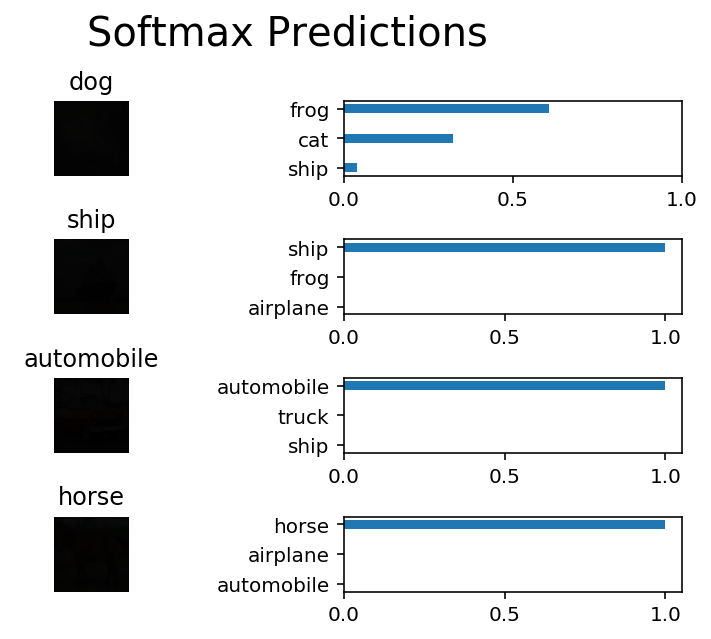

In [124]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

batch_size = 64
save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    print("Begin Testing...")
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.